### Map Reduce

In [4]:
content = 'When a module is reloaded, its dictionary (containing the module global variables) is retained.' 
content = content + ' Redefinitions of names will override the old definitions, so this is generally not a problem.'

In [5]:
content

'When a module is reloaded, its dictionary (containing the module global variables) is retained. Redefinitions of names will override the old definitions, so this is generally not a problem.'

In [7]:
splitted = content.split()

In [9]:
mapped = map(lambda x : (x , 1) , splitted)

In [11]:
mapped_sorted = sorted(mapped)

In [12]:
mapped_sorted

[('(containing', 1),
 ('Redefinitions', 1),
 ('When', 1),
 ('a', 1),
 ('a', 1),
 ('definitions,', 1),
 ('dictionary', 1),
 ('generally', 1),
 ('global', 1),
 ('is', 1),
 ('is', 1),
 ('is', 1),
 ('its', 1),
 ('module', 1),
 ('module', 1),
 ('names', 1),
 ('not', 1),
 ('of', 1),
 ('old', 1),
 ('override', 1),
 ('problem.', 1),
 ('reloaded,', 1),
 ('retained.', 1),
 ('so', 1),
 ('the', 1),
 ('the', 1),
 ('this', 1),
 ('variables)', 1),
 ('will', 1)]

In [14]:
list(filter( lambda x: x[0] == 'a' ,mapped_sorted))

[('a', 1), ('a', 1)]

In [16]:
[x for x in mapped_sorted if x[0] == 'a' ]

[('a', 1), ('a', 1)]

In [20]:
keys = set(splitted)

In [23]:
list_of_lists_by_key = [[w for w in mapped_sorted if w[0] == k] for k in keys]

In [25]:
list_of_lists_by_key[1]

[('is', 1), ('is', 1), ('is', 1)]

In [42]:
reduce(lambda x,y : (x[0] , x[1]+y[1]) , list_of_lists_by_key[1])

('is', 3)

In [43]:
[ reduce(lambda x,y : (x[0] , x[1]+y[1]) , z) for z in list_of_lists_by_key]

[('old', 1),
 ('is', 3),
 ('global', 1),
 ('When', 1),
 ('module', 2),
 ('problem.', 1),
 ('names', 1),
 ('its', 1),
 ('generally', 1),
 ('override', 1),
 ('(containing', 1),
 ('dictionary', 1),
 ('reloaded,', 1),
 ('not', 1),
 ('a', 2),
 ('Redefinitions', 1),
 ('retained.', 1),
 ('this', 1),
 ('of', 1),
 ('variables)', 1),
 ('will', 1),
 ('so', 1),
 ('definitions,', 1),
 ('the', 2)]

In [47]:
def map_reduce(content):
    
    #split
    words = content.split()
    keys = set(words)
    
    #map
    mapped = sorted(map(lambda x : (x , 1) , splitted))
    
    #reduce
    list_of_mapped_by_key = [[w for w in mapped_sorted if w[0] == k] for k in keys]
    reduced = [ reduce(lambda x,y : (x[0] , x[1]+y[1]) , z) for z in list_of_lists_by_key]

    return reduced
    
    

In [48]:
map_reduce(content)

[('old', 1),
 ('is', 3),
 ('global', 1),
 ('When', 1),
 ('module', 2),
 ('problem.', 1),
 ('names', 1),
 ('its', 1),
 ('generally', 1),
 ('override', 1),
 ('(containing', 1),
 ('dictionary', 1),
 ('reloaded,', 1),
 ('not', 1),
 ('a', 2),
 ('Redefinitions', 1),
 ('retained.', 1),
 ('this', 1),
 ('of', 1),
 ('variables)', 1),
 ('will', 1),
 ('so', 1),
 ('definitions,', 1),
 ('the', 2)]

### Probabo conexion SQL

In [1]:
import psycopg2
import sys
import pprint
 

In [3]:
conn_string = "host='localhost' dbname='gtrader' user='postgres' password='postgres'"
print("Connecting to database\n	->%s" % (conn_string))
conn = psycopg2.connect(conn_string)
cursor = conn.cursor()
print ("Connected!\n")

Connecting to database
	->host='localhost' dbname='gtrader' user='postgres' password='postgres'
Connected!



In [7]:

class BookEvent:

    eventDate = None
    eventTime = None

    eventType = None
    eventPrice = None
    eventSize = None

    bidPrice = None
    bidSize = None
    askPrice = None
    askSize = None


In [8]:
b = BookEvent()

In [9]:
b.askPrice = 123

In [13]:
a = 'crate @tablename ();'

In [14]:
a.replace('@tablename' , 'BookEvent')

'crate BookEvent ();'

In [4]:
cursor.execute("select * from nymex_future_cl_201712 order by event_date desc limit 10")

# retrieve the records from the database
records = cursor.fetchall()

# print out the records using pretty print
# note that the NAMES of the columns are not shown, instead just indexes.
# for most people this isn't very useful so we'll show you how to return
# columns as a dictionary (hash) in the next example.
##pprint.pprint(records)
print ('Listo!')

Listo!


In [6]:
records[0]

(datetime.date(2017, 11, 10),
 datetime.time(0, 0, 5, 375000),
 'ASK',
 Decimal('57.05'),
 61,
 Decimal('57.05'),
 61,
 Decimal('57.04'),
 58,
 None)

## Importando datos de SQL a Pandas

In [5]:
import pandas as pd

In [6]:
df1 = pd.read_sql("select * from nymex_future_cl_201712 order by event_date desc",conn)

In [12]:
print len(df1)

688547


In [9]:
import matplotlib.pyplot as plt
from datetime import time , datetime , date
plt.rcParams['figure.figsize'] = (15, 10)

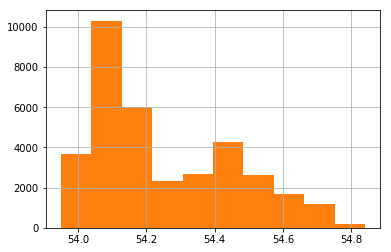

In [17]:
df1[df1['event_type'] == 'TRADE']['event_price'].hist()
plt.show()

In [10]:
df2 = df1.copy()

In [11]:
df2 = df1.copy()
df2['datetime'] = df2.apply(lambda x : datetime.combine( x['event_date'] , x['event_time'] ) , axis = 1)
df2['event_time'] = df2['event_time'].apply(lambda x : time.strftime(x , '%H:%M:%S.%f'))
df2['event_date'] = df2['event_date'].apply(lambda x : date.strftime(x , '%Y-%m-%d'))
df2 = df2.set_index(['datetime'])

In [13]:
df2.head()

,event_date,event_time,event_type,event_price,event_size,ask_price,ask_size,bid_price,bid_size,label
datetime,,,,,,,,,,
2017-11-03 00:00:00.410,2017-11-03,00:00:00.410000,BID,54.79,58,54.80,54,54.79,58,None
2017-11-03 08:19:08.100,2017-11-03,08:19:08.100000,TRADE,54.80,2,54.81,48,54.80,44,None
2017-11-03 00:00:01.436,2017-11-03,00:00:01.436000,BID,54.79,65,54.80,54,54.79,65,None
2017-11-03 08:19:08.560,2017-11-03,08:19:08.560000,BID,54.80,28,54.81,48,54.80,28,None
2017-11-03 00:00:01.441,2017-11-03,00:00:01.441000,ASK,54.80,40,54.80,40,54.79,65,None


In [14]:
trades = df2[df2['event_type'] == 'TRADE']

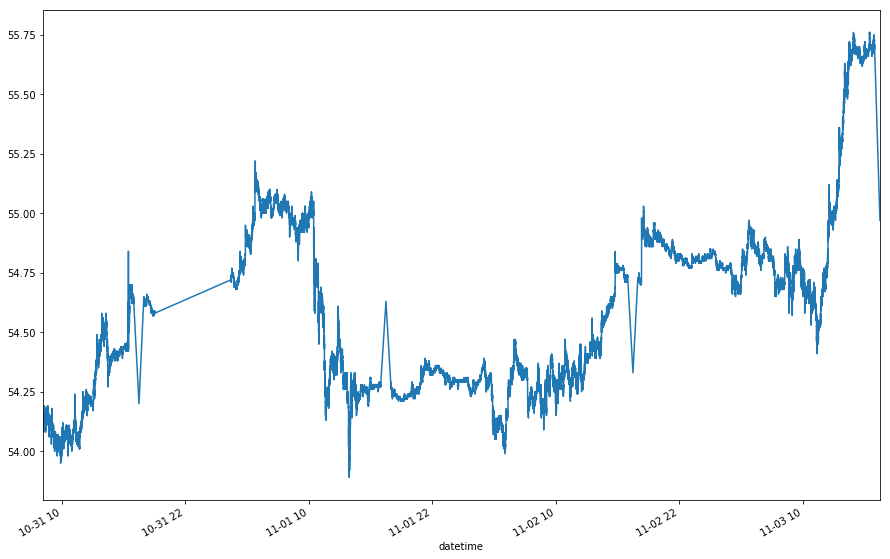

In [15]:
trades['event_price'].plot()
plt.show()

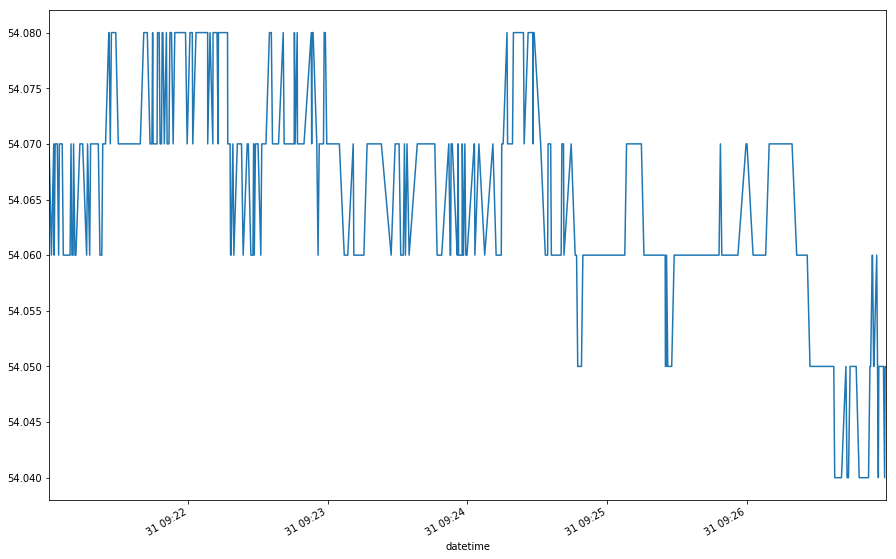

,event_date,event_time,event_type,event_price,event_size,ask_price,ask_size,bid_price,bid_size,label
datetime,,,,,,,,,,
2017-10-31 09:21:59.658,2017-10-31,09:21:59.658000,TRADE,54.07,1,54.08,63,54.07,41,None
2017-10-31 09:22:00.861,2017-10-31,09:22:00.861000,TRADE,54.08,50,54.08,76,54.07,40,None
2017-10-31 09:22:01.065,2017-10-31,09:22:01.065000,TRADE,54.08,34,54.08,22,54.07,73,None
2017-10-31 09:22:01.163,2017-10-31,09:22:01.163000,TRADE,54.08,1,54.08,3,54.07,104,None
2017-10-31 09:22:01.864,2017-10-31,09:22:01.864000,TRADE,54.08,1,54.08,37,54.07,73,None


In [66]:
trades_in_interval_1 = trades[(trades['event_time'] >= '09:21:00') & (trades['event_time'] <= '09:27:00')]
trades_in_interval_1['event_price'].plot()
plt.show()
trades_in_interval_1.head()

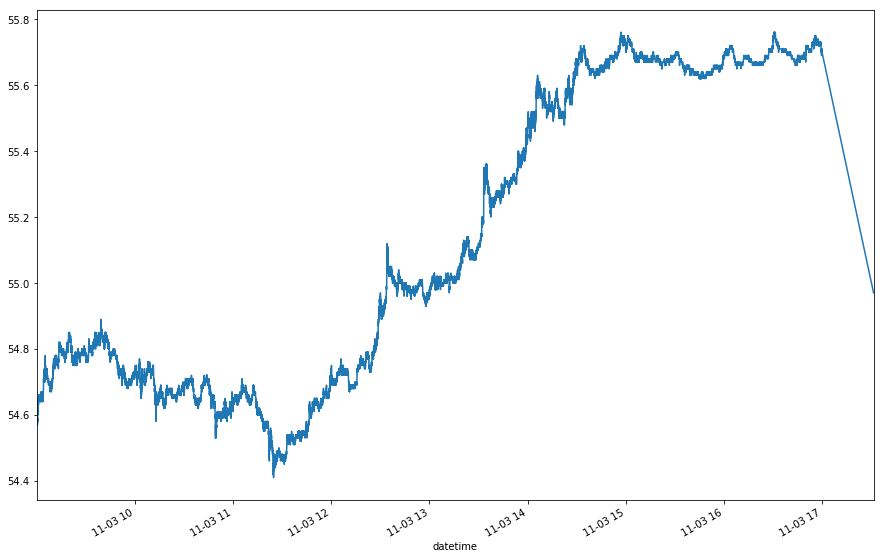

,event_date,event_time,event_type,event_price,event_size,ask_price,ask_size,bid_price,bid_size,label
datetime,,,,,,,,,,
2017-11-03 09:36:50.397,2017-11-03,09:36:50.397000,TRADE,54.81,10,54.82,70,54.81,70,None
2017-11-03 09:36:50.699,2017-11-03,09:36:50.699000,TRADE,54.82,1,54.82,67,54.81,49,None
2017-11-03 09:36:51.300,2017-11-03,09:36:51.300000,TRADE,54.82,6,54.82,52,54.81,72,None
2017-11-03 09:36:51.401,2017-11-03,09:36:51.401000,TRADE,54.82,13,54.82,31,54.81,109,None
2017-11-03 09:36:52.606,2017-11-03,09:36:52.606000,TRADE,54.82,2,54.83,88,54.82,47,None


In [20]:
trades_in_interval_1 = trades[ (trades['event_date'] == '2017-11-03') 
                              & (trades['event_time'] >= '09:00:00') & (trades['event_time'] <= '18:00:00')]
trades_in_interval_1['event_price'].plot()
plt.show()
trades_in_interval_1.head()